# Problem Statement
* What features are most likely present in individuals with heart disease?
* Which predictive model is the most effective in predicting the likelihood of individuals having heart disease?

# Data Collection
* Source of dataset https://archive.ics.uci.edu/dataset/45/heart+disease
* Source of the publication https://www.semanticscholar.org/paper/International-application-of-a-new-probability-for-Detrano-J%C3%A1nosi/a7d714f8f87bfc41351eb5ae1e5472f0ebbe0574

According to the document `heart_disease.names`, there are only 14 selected attributes:
- `age`: age in years  
- `sex`: sex 
  - 1 = male 
  - 0 = female 
- `cp`: chest pain type
  - 1: typical angina (_chest pain or discomfort that closely matches the classic symptoms of angina pectoris._)
  - 2: atypical angina (_chest pain or discomfort that doesn't entirely fit the classic angina symptoms but still suggests a possible heart-related issue._)
  - 3: non-anginal pain (_chest discomfort or pain that is not related to the heart and is not typical of angina._)
  - 4: asymptomatic (_absence of any symptoms, including chest pain or discomfort._)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl      
- `fbs`: fasting blood sugar > 120 mg/dl
  - 1 = true
  - 0 = false      
- `restecg`: resting electrocardiographic results
  - 0: normal
  - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria   
- `thalach`: maximum heart rate achieved   
- `exang`: exercise induced angina 
  - 1 = yes
  - 0 = no     
- `oldpeak`: ST depression induced by exercise relative to rest   
- `slope`: the slope of the peak exercise ST segment
  - 1: upsloping
  - 2: flat
  - 3: downsloping     
- `ca`: number of major vessels colored by flourosopy (_A higher value, such as 2 or 3, may suggest a more severe or extensive blockage or narrowing of coronary arteries_)
  - 0: No major vessels colored or observed.
  - 1: One major vessel colored or observed.
  - 2: Two major vessels colored or observed.
  - 3: Three major vessels colored or observed.
- `thal`: thallium stress test 
  - 3 = normal (_blood supply to the heart muscle is normal, and there are no significant issues detected during the test._)
  - 6 = fixed defect (_portion of the heart muscle has permanent damage or reduced blood supply, which is not expected to improve with time or treatment._)
  - 7 = reversable defect (_there is a temporary impairment in the blood supply to a part of the heart muscle. This condition may improve with treatment or rest, suggesting that it is not a permanent issue._)    
- `num`: diagnosis of heart disease (angiographic disease status)
  - 0: < 50% diameter narrowing
  - 1: > 50% diameter narrowing 

In [1]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [2]:
# Load the data into a DataFrame
processed_data = pd.read_csv('processed.cleveland.data', header=None, encoding='latin1')

# Preview first 5 rows of data
processed_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Data Cleaning and Preparation
Names of the columns will be replaced with the given names from the document provided.

In [3]:
# Define the column names
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

# Select the relevant columns and assign the column names
processed_data.columns = column_names[:len(processed_data.columns)]

# Preview the data
processed_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


__Features Transformation__
- Replace numerical values of `cp` to categorical values:
  - 1: typical angina 
  - 2: atypical angina 
  - 3: non-anginal pain 
  - 4: asymptomatic 
- Replace numerical values of `restecg` to categorical values:
  - 0: normal
  - 1: abnormal ST-T wave
  - 2: LVH (_left ventricular hypertrophy_)
- Replace numerical values of `slope` to categorical values:
  - 1: upsloping
  - 2: flat
  - 3: downsloping
- Replace numerical values of `thal` to categorical values:
  - 3 = normal
  - 6 = fixed defect
  - 7 = reversable defect
- Replace column name `num` with `heart_disease`, binary numerical values remains:
  - 0: No heart disease
  - 1: Presence of heart disease 

In [5]:
# Replace numerical values of 'cp' to categorical values
cp_values = {1:'typical angina', 2:'atypical angina', 3:'non-anginal pain', 4:'asymptomatic'}
processed_data['cp'] = processed_data['cp'].replace(cp_values)

# Replace numerical values of 'restecg' to categorical values
restecg_values = {0:'normal', 1:'abnormal ST-T wave', 2: 'LVH'}
processed_data['restecg'] = processed_data['restecg'].replace(restecg_values)

# Replace numerical values of 'slope' to categorical values
slope_values = {1:'upsloping', 2:'flat', 3:'downsloping'}
processed_data['slope'] = processed_data['slope'].replace(slope_values)

# Replace numerical values of 'thal' to categorical values
thal_values = {'3.0':'normal', '6.0':'fixed defect', '7.0':'reversable defect'}
processed_data['thal'] = processed_data['thal'].replace(thal_values)

# Replace column name `num` with `heart_disease`
processed_data = processed_data.rename(columns={'num': 'heart_disease'})

processed_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63.0,1.0,typical angina,145.0,233.0,1.0,LVH,150.0,0.0,2.3,downsloping,0.0,fixed defect,0
1,67.0,1.0,asymptomatic,160.0,286.0,0.0,LVH,108.0,1.0,1.5,flat,3.0,normal,2
2,67.0,1.0,asymptomatic,120.0,229.0,0.0,LVH,129.0,1.0,2.6,flat,2.0,reversable defect,1
3,37.0,1.0,non-anginal pain,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0
4,41.0,0.0,atypical angina,130.0,204.0,0.0,LVH,172.0,0.0,1.4,upsloping,0.0,normal,0


In [6]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    float64
 2   cp             303 non-null    object 
 3   trestbps       303 non-null    float64
 4   chol           303 non-null    float64
 5   fbs            303 non-null    float64
 6   restecg        303 non-null    object 
 7   thalach        303 non-null    float64
 8   exang          303 non-null    float64
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    object 
 11  ca             303 non-null    object 
 12  thal           303 non-null    object 
 13  heart_disease  303 non-null    int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 33.3+ KB


* `ca` datatype need to change from object into numerical

In [7]:
# 'ca' column contains numeric values in string format, e.g., '0', '1', '2'
processed_data['ca'] = pd.to_numeric(processed_data['ca'], errors='coerce')

In [8]:
print(processed_data['ca'].unique())
print(processed_data['thal'].unique())
print(processed_data['heart_disease'].unique())

[ 0.  3.  2.  1. nan]
['fixed defect' 'normal' 'reversable defect' '?']
[0 2 1 3 4]


* Missing values of `nan` and `?` were found in `ca` and `thal` columns respectively. 
* Calculate the percentage of missing values in both columns, it will be removed if the percentage is insignificant (_less than 5%_)
* There are 4 unique values in `heart_disease` column so change values of 1 and above to 1.

In [9]:
# Count the number of rows with '?' in the 'ca' column
ca_unknown = processed_data['ca'].isna().sum()

# Calculate the percentage of '?'
ca_unknown_percent = (ca_unknown/len(processed_data))*100
print(f"Percentage of null values in 'ca' column is {round(ca_unknown_percent,2)}%.")

# Count the number of rows with '?' in the 'thal' column
thal_unknown = (processed_data['thal'] == '?').sum()

# Calculate the percentage of '?'
thal_unknown_percent = (thal_unknown/len(processed_data))*100
print(f"Percentage of '?' value in thal column is {round(thal_unknown_percent,2)}%.")

# Replace values 1 and above with 1
processed_data['heart_disease'] = np.where(processed_data['heart_disease'] >= 1, 1, processed_data['heart_disease'])

Percentage of null values in 'ca' column is 1.32%.
Percentage of '?' value in thal column is 0.66%.


Since percentage of missing data in the dataframe is insignificant, missing values will be removed from both columns.

In [10]:
# Remove missing values from both columns
processed_data = processed_data.dropna(subset=['ca'])
processed_data = processed_data[processed_data['thal'] != '?']

# Verify that missing valueshas been removed
print(processed_data['ca'].unique())
print(processed_data['thal'].unique())

# Verify the heart_disease values has only 0 and 1
print(processed_data['heart_disease'].unique())

[0. 3. 2. 1.]
['fixed defect' 'normal' 'reversable defect']
[0 1]


In [11]:
# Change datatypes of 'ca' and 'thal' into numerical
processed_data['ca'] = processed_data['ca'].astype(float)

processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            297 non-null    float64
 1   sex            297 non-null    float64
 2   cp             297 non-null    object 
 3   trestbps       297 non-null    float64
 4   chol           297 non-null    float64
 5   fbs            297 non-null    float64
 6   restecg        297 non-null    object 
 7   thalach        297 non-null    float64
 8   exang          297 non-null    float64
 9   oldpeak        297 non-null    float64
 10  slope          297 non-null    object 
 11  ca             297 non-null    float64
 12  thal           297 non-null    object 
 13  heart_disease  297 non-null    int64  
dtypes: float64(9), int64(1), object(4)
memory usage: 34.8+ KB


# Exploratory Data Analysis
* Data visualization using box plots and bar plots.
* Hypothesis testing using two-sample t-test and Chi-square test.

## Age vs Heart Disease

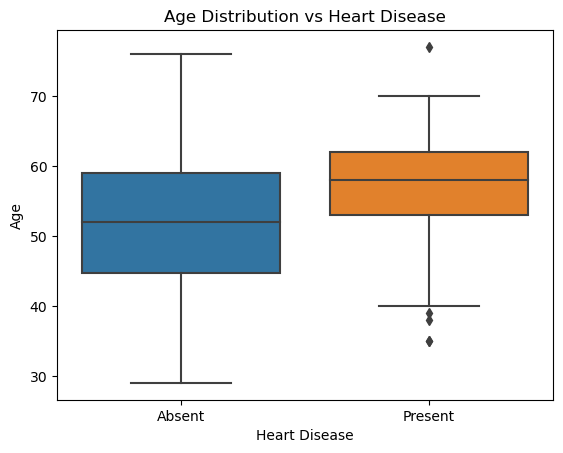

In [12]:
# Create boxplot age vs heart disease
sns.boxplot(x='heart_disease', y='age', data=processed_data)
plt.title('Age Distribution vs Heart Disease')
plt.xticks([0, 1], ['Absent', 'Present'])
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

In [13]:
# Separate the 'age' values for individuals with and without heart disease
age_with_heart_disease = processed_data[processed_data['heart_disease'] == 1]['age']
age_without_heart_disease = processed_data[processed_data['heart_disease'] == 0]['age']

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(age_with_heart_disease, age_without_heart_disease)

# Display the results
print("P-Value:", p_value)

# Interpret the results based on the p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in age between individuals with and without heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in age between individuals with and without heart disease.")

P-Value: 7.862867945608019e-05
Reject the null hypothesis: There is a significant difference in age between individuals with and without heart disease.


Older individuals have higher likelihood of having heart disease.

### Sex vs Heart Disease

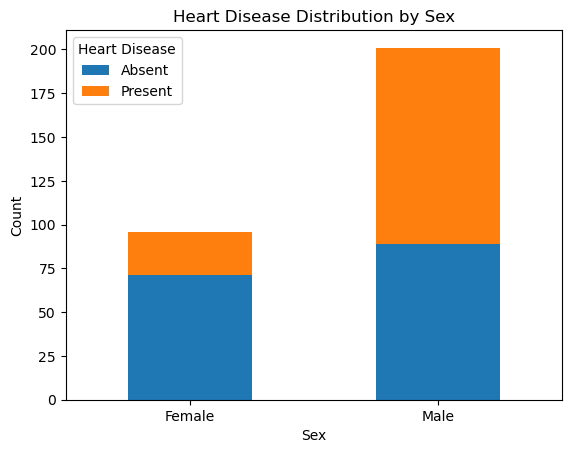

In [14]:
# Data
heart_disease_counts = processed_data.groupby(['sex', 'heart_disease']).size().unstack().fillna(0)

# Create a bar plot
heart_disease_counts.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Heart Disease Distribution by Sex')
plt.xlabel('Sex')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.ylabel('Count')

# Show the plot
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

In [15]:
# Separate the 'sex' values for individuals with and without heart disease
sex_with_heart_disease = processed_data[processed_data['heart_disease'] == 1]['sex']
sex_without_heart_disease = processed_data[processed_data['heart_disease'] == 0]['sex']

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(sex_with_heart_disease, sex_without_heart_disease)

# Display the results
print("P-Value:", p_value)

# Interpret the results based on the p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sex between individuals with and without heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sex between individuals with and without heart disease.")

P-Value: 1.085075745016725e-06
Reject the null hypothesis: There is a significant difference in sex between individuals with and without heart disease.


Male individuals have higher likelihood of having heart disease compared to female.

### Chest Pain vs Heart Disease

In [16]:
Xtab = pd.crosstab(processed_data.cp, processed_data.heart_disease)
Xtab

heart_disease,0,1
cp,,
asymptomatic,39,103
atypical angina,40,9
non-anginal pain,65,18
typical angina,16,7


In [17]:
# Perform Chi-Square Test
chi2, pval, dof, exp = chi2_contingency(Xtab)

# Interpret the results based on the p-value
alpha = 0.05  # significance level
if pval < alpha:
    print("Reject the null hypothesis: There is a significant difference in chest pain between individuals with and without heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in chest pain between individuals with and without heart disease.")
print("P-value is " + str(pval))

Reject the null hypothesis: There is a significant difference in chest pain between individuals with and without heart disease.
P-value is 1.1782838465918115e-16


Individuals with asymptomatic chest pain have a higher likelihood of having heart disease compared to the other chest pain types.

### Resting Blood Pressure vs Heart Disease

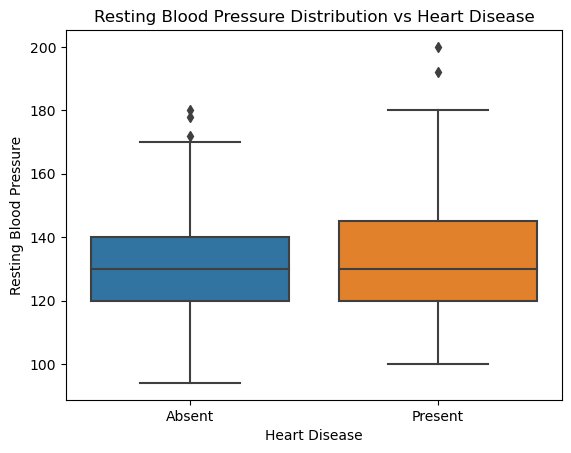

In [18]:
# Create boxplot trestbps vs heart disease
sns.boxplot(x='heart_disease', y='trestbps', data=processed_data)
plt.title('Resting Blood Pressure Distribution vs Heart Disease')
plt.xticks([0, 1], ['Absent', 'Present'])
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure')
plt.show()

In [19]:
# Separate the 'trestbps' values for individuals with and without heart disease
trestbps_with_heart_disease = processed_data[processed_data['heart_disease'] == 1]['trestbps']
trestbps_without_heart_disease = processed_data[processed_data['heart_disease'] == 0]['trestbps']

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(trestbps_with_heart_disease, trestbps_without_heart_disease)

# Display the results
print("P-Value:", p_value)

# Interpret the results based on the p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in resting blood pressure between individuals with and without heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in resting blood pressure between individuals with and without heart disease.")

P-Value: 0.008054796358875278
Reject the null hypothesis: There is a significant difference in resting blood pressure between individuals with and without heart disease.


Even though median resting blood pressure is similar for individual with and without heart disease, the maximum and minimum resting blood pressure tend to be higher in individuals with heart disease.

### Cholesterol vs Heart Disease

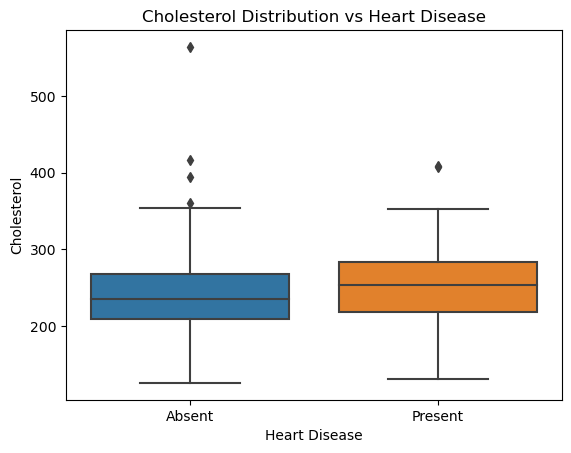

In [20]:
# Create boxplot cholesterol vs heart disease
sns.boxplot(x='heart_disease', y='chol', data=processed_data)
plt.title('Cholesterol Distribution vs Heart Disease')
plt.xticks([0, 1], ['Absent', 'Present'])
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()

In [21]:
# Separate the 'chol' values for individuals with and without heart disease
chol_with_heart_disease = processed_data[processed_data['heart_disease'] == 1]['chol']
chol_without_heart_disease = processed_data[processed_data['heart_disease'] == 0]['chol']

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(chol_with_heart_disease, chol_without_heart_disease)

# Display the results
print("P-Value:", p_value)

# Interpret the results based on the p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in cholesterol level between individuals with and without heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in cholesterol level between individuals with and without heart disease.")

P-Value: 0.16758776714742368
Fail to reject the null hypothesis: There is no significant difference in cholesterol level between individuals with and without heart disease.


### Fasting Blood Glucose vs Heart Disease

In [22]:
Xtab = pd.crosstab(processed_data.fbs, processed_data.heart_disease)
Xtab

heart_disease,0,1
fbs,,
0.0,137,117
1.0,23,20


In [23]:
# Perform Chi-Square Test
chi2, pval, dof, exp = chi2_contingency(Xtab)

# Interpret the results based on the p-value
alpha = 0.05  # significance level
if pval < alpha:
    print("Reject the null hypothesis: There is a significant difference in fasting blood glucose between individuals with and without heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in fasting blood glucose between individuals with and without heart disease.")
print("P-value is " + str(pval))

Fail to reject the null hypothesis: There is no significant difference in fasting blood glucose between individuals with and without heart disease.
P-value is 1.0


### Resting ECG vs Heart Disease

In [24]:
Xtab = pd.crosstab(processed_data.restecg, processed_data.heart_disease)
Xtab

heart_disease,0,1
restecg,,
LVH,67,79
abnormal ST-T wave,1,3
normal,92,55


In [25]:
# Perform Chi-Square Test
chi2, pval, dof, exp = chi2_contingency(Xtab)

# Interpret the results based on the p-value
alpha = 0.05  # significance level
if pval < alpha:
    print("Reject the null hypothesis: There is a significant difference in resting ECG between individuals with and without heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in resting ECG between individuals with and without heart disease.")
print("P-value is " + str(pval))

Reject the null hypothesis: There is a significant difference in resting ECG between individuals with and without heart disease.
P-value is 0.008331151353680854


LVH and abnormal ST-T waves is more prevalent among individuals with heart disease compared to without heart disease.

### Maximum Heart Rate vs Heart Disease

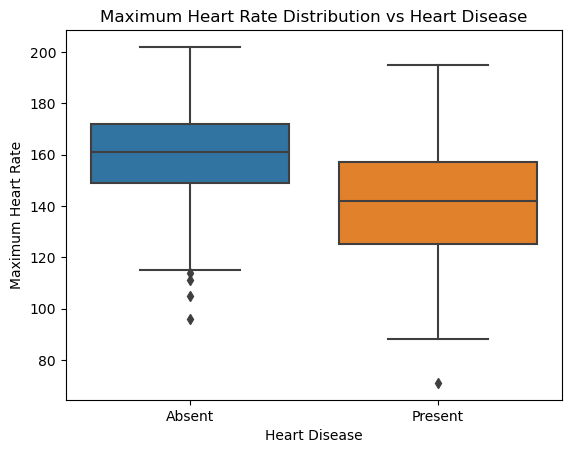

In [26]:
# Create boxplot thalach vs heart disease
sns.boxplot(x='heart_disease', y='thalach', data=processed_data)
plt.title('Maximum Heart Rate Distribution vs Heart Disease')
plt.xticks([0, 1], ['Absent', 'Present'])
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate')
plt.show()

In [27]:
# Separate the 'thalach' values for individuals with and without heart disease
thalach_with_heart_disease = processed_data[processed_data['heart_disease'] == 1]['thalach']
thalach_without_heart_disease = processed_data[processed_data['heart_disease'] == 0]['thalach']

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(thalach_with_heart_disease, thalach_without_heart_disease)

# Display the results
print("P-Value:", p_value)

# Interpret the results based on the p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in maximum heart rate between individuals with and without heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in maximum heart rate between individuals with and without heart disease.")

P-Value: 2.239715323393672e-14
Reject the null hypothesis: There is a significant difference in maximum heart rate between individuals with and without heart disease.


Individuals with heart disease are likely to have lower maximum heart rate.

### Exercise-induced Angina vs Heart Disease

In [28]:
Xtab = pd.crosstab(processed_data.exang, processed_data.heart_disease )
Xtab

heart_disease,0,1
exang,,
0.0,137,63
1.0,23,74


In [29]:
# Perform Chi-Square Test
chi2, pval, dof, exp = chi2_contingency(Xtab)

# Interpret the results based on the p-value
alpha = 0.05  # significance level
if pval < alpha:
    print("Reject the null hypothesis: There is a significant difference in exercise-induced angina between individuals with and without heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in exercise-induced angina between individuals with and without heart disease.")
print("P-value is " + str(pval))

Reject the null hypothesis: There is a significant difference in exercise-induced angina between individuals with and without heart disease.
P-value is 9.510884265909016e-13


Individuals with exercise-induced angina tend to have a higher prevalence of heart disease compared to those without exercise-induced angina.

###  Exercise-induced ST depression vs Heart Disease

In [30]:
# Separate the 'oldpeak' values for individuals with and without heart disease
oldpeak_with_heart_disease = processed_data[processed_data['heart_disease'] == 1]['oldpeak']
oldpeak_without_heart_disease = processed_data[processed_data['heart_disease'] == 0]['oldpeak']

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(oldpeak_with_heart_disease, oldpeak_without_heart_disease)

# Display the results
print("P-Value:", p_value)

# Interpret the results based on the p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in exercise-induced ST depression between individuals with and without heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in exercise-induced ST depression between individuals with and without heart disease.")

P-Value: 2.1597372771142576e-14
Reject the null hypothesis: There is a significant difference in exercise-induced ST depression between individuals with and without heart disease.


### Slope of the Peak Exercise ST Segment vs Heart Disease

In [31]:
Xtab = pd.crosstab(processed_data.slope, processed_data.heart_disease )
Xtab

heart_disease,0,1
slope,,
downsloping,9,12
flat,48,89
upsloping,103,36


In [32]:
# Perform Chi-Square Test
chi2, pval, dof, exp = chi2_contingency(Xtab)

# Interpret the results based on the p-value
alpha = 0.05  # significance level
if pval < alpha:
    print("Reject the null hypothesis: There is a significant difference in slope of the peak exercise ST segment between individuals with and without heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in slope of the peak exercise ST segment  between individuals with and without heart disease.")
print("P-value is " + str(pval))

Reject the null hypothesis: There is a significant difference in slope of the peak exercise ST segment between individuals with and without heart disease.
P-value is 3.630107106911135e-10


Relatively high number of individuals with heart disease have a flat slope, while fewer have an upsloping or downsloping slope.

### Number of Major Vessels Blockage vs Heart Disease

In [33]:
Xtab = pd.crosstab(processed_data.ca, processed_data.heart_disease)
Xtab

heart_disease,0,1
ca,,
0.0,129,45
1.0,21,44
2.0,7,31
3.0,3,17


In [34]:
# Perform Chi-Square Test
chi2, pval, dof, exp = chi2_contingency(Xtab)

# Interpret the results based on the p-value
alpha = 0.05  # significance level
if pval < alpha:
    print("Reject the null hypothesis: There is a significant difference in number of major vessels colored by fluoroscopy between individuals with and without heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in number of major vessels colored by fluoroscopy between individuals with and without heart disease.")
print("P-value is " + str(pval))

Reject the null hypothesis: There is a significant difference in number of major vessels colored by fluoroscopy between individuals with and without heart disease.
P-value is 1.37257765344901e-15


Individuals with more colored vessels tend to have a higher prevalence of heart disease.

### Thallium Stress Test vs Heart Disease

In [35]:
Xtab = pd.crosstab(processed_data.thal, processed_data.heart_disease)
Xtab

heart_disease,0,1
thal,,
fixed defect,6,12
normal,127,37
reversable defect,27,88


In [36]:
# Perform Chi-Square Test
chi2, pval, dof, exp = chi2_contingency(Xtab)

# Interpret the results based on the p-value
alpha = 0.05  # significance level
if pval < alpha:
    print("Reject the null hypothesis: There is a significant difference in thallium stress test between individuals with and without heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in thallium stress test between individuals with and without heart disease.")
print("P-value is " + str(pval))

Reject the null hypothesis: There is a significant difference in thallium stress test between individuals with and without heart disease.
P-value is 1.241672838622867e-18


Individuals with a reversible defect in the thallium stress test tend to have a higher prevalence of heart disease compared to those with fixed defect or normal results.

__Features Transformation__
- One-Hot Encoding of `cp`, `restecg`, `slope` and `thal` columns to convert nominal categorical values into numerical values.

In [37]:
# Perform one-hot encoding for 'cp', 'restecg', 'slope', and 'thal'
processed_data = pd.get_dummies(processed_data, columns=['cp', 'restecg', 'slope', 'thal'])

# Print the modified processed_data DataFrame
processed_data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,heart_disease,...,cp_typical angina,restecg_LVH,restecg_abnormal ST-T wave,restecg_normal,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,...,1,1,0,0,1,0,0,1,0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1,...,0,1,0,0,0,1,0,0,1,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,...,0,1,0,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,0,0,1,1,0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,1,0,0,0,0,1,0,1,0


__Correlation Heatmap__
- Investigate which features are highly correlated with the individuals with heart diseases.

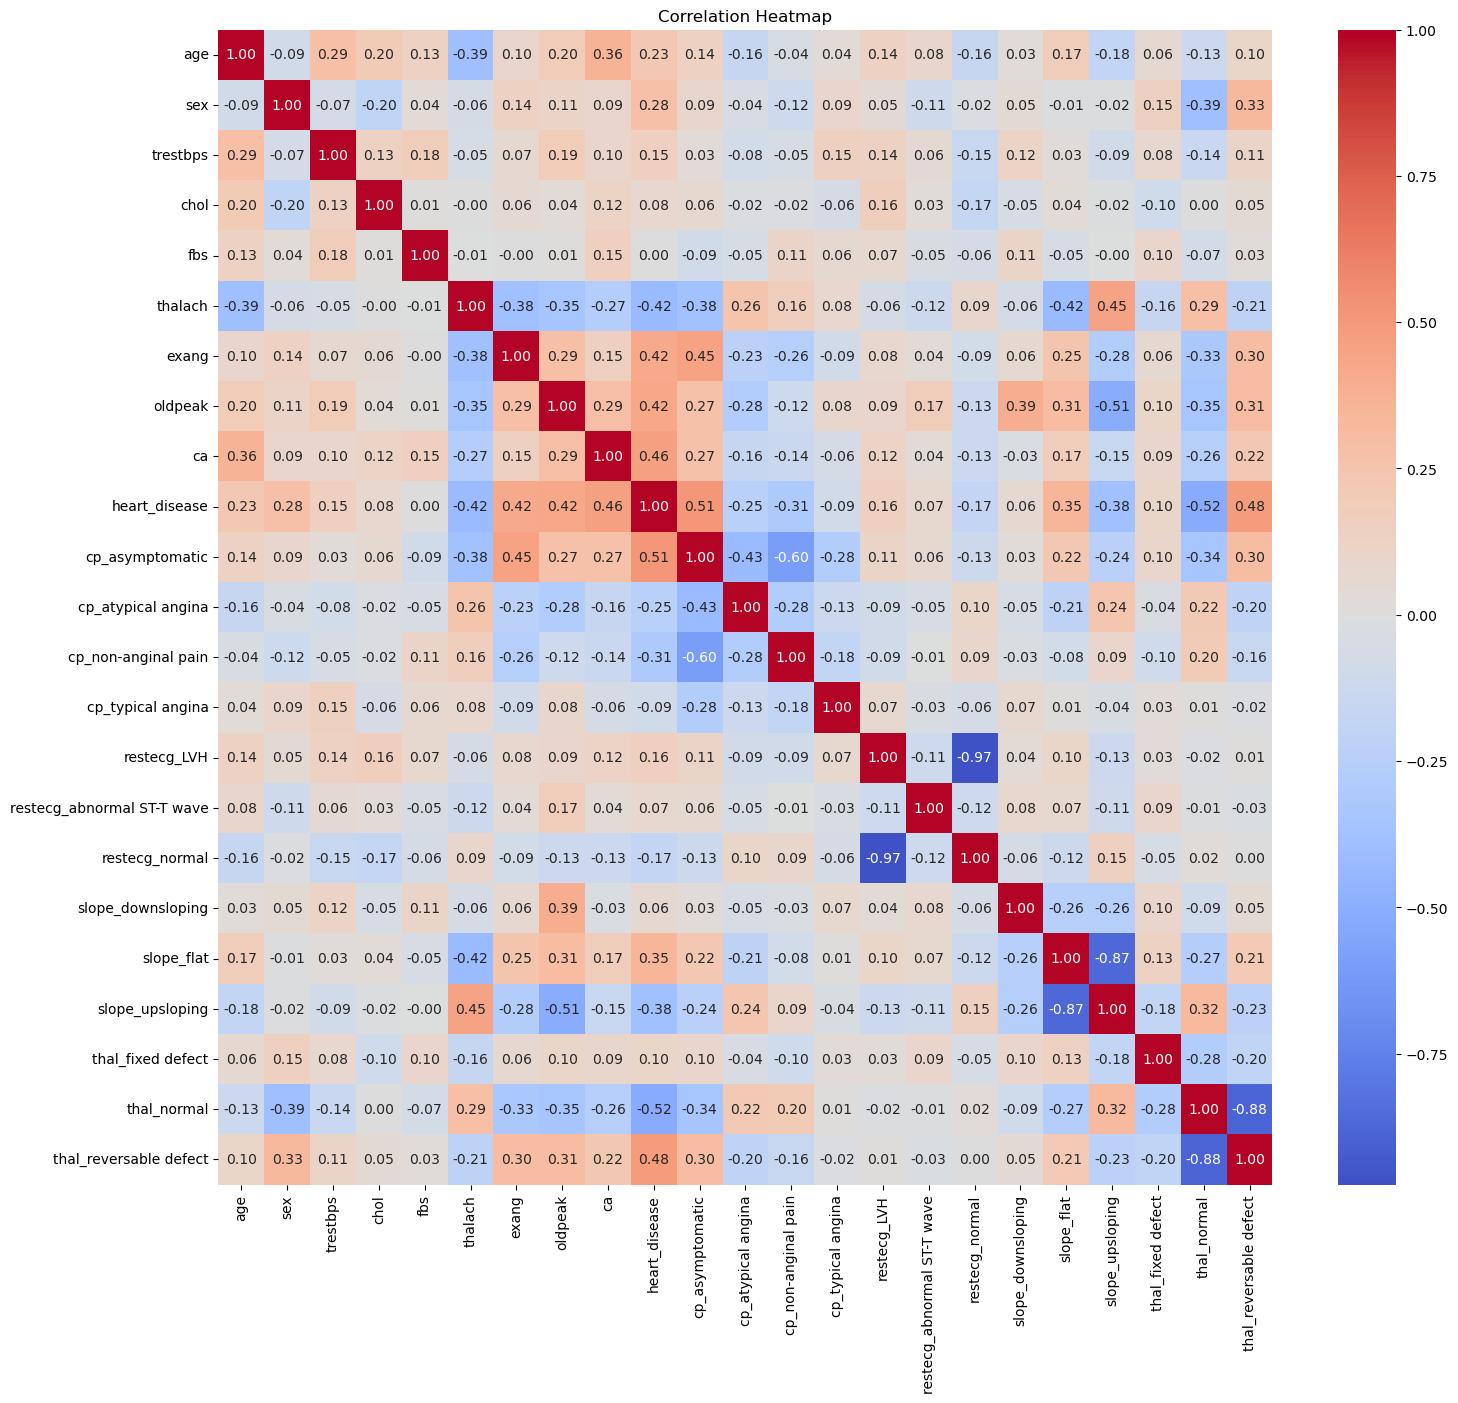

In [38]:
# Create correlation matrix 
correlation_matrix = processed_data.corr()

# Create correlation heatmap
plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Only features with correlation coefficents greater than 4 will be selected for the predictive models.

In [39]:
# Given data
corr_data = {
    'Features': ['cp_asymptomatic', 'thal_reversable defect', 'ca', 'exang', 'oldpeak'],
    'Correlation Coefficient': [0.51, 0.48, 0.46, 0.42, 0.42]
}

# Create a DataFrame and sort it by correlation coefficient in descending order
corr_df = pd.DataFrame(corr_data)
corr_df_sorted = corr_df.sort_values(by='Correlation Coefficient', ascending=False)

# Display the sorted DataFrame
corr_df_sorted

,Features,Correlation Coefficient
0,cp_asymptomatic,0.51
1,thal_reversable defect,0.48
2,ca,0.46
3,exang,0.42
4,oldpeak,0.42


Individuals with heart disease tend to have:
- Asymptomatic chest pain
- Cardiac reversible defect in thallium stress test
- Narrowing or blockage of several major vessels in fluoroscopy
- Exercise-induced angina
- Exercise-induced ST-depression in ECG test

### Logistic Regression

In [40]:
# Import LogisticRegression, model evaluation metrics and train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Create X (feature data) and y (target data)
X = processed_data[['cp_asymptomatic', 'thal_reversable defect', 'ca', 'exang', 'oldpeak']]
y = processed_data['heart_disease']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression
lr = LogisticRegression()

# Train the regression with training data
lr.fit(X_train, y_train)

# Predict with test data
y_pred = lr.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, y_pred)
lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_class_report = classification_report(y_test, y_pred)


print("Logistic Regression Accuracy")
print(lr_accuracy)
print("")
print("Logistic Regression Confusion Matrix")
print(lr_conf_matrix)
print("")
print("Logistic Regression Classification Report")
print(lr_class_report)

Logistic Regression Accuracy
0.8833333333333333

Logistic Regression Confusion Matrix
[[33  3]
 [ 4 20]]

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



### Decision Tree Classifier

In [41]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initiate Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the classifier with training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred)
dt_conf_matrix = confusion_matrix(y_test, y_pred)
dt_class_report = classification_report(y_test, y_pred)

print("Decision Tree Classifier Accuracy")
print(dt_accuracy)
print("")
print("Decision Tree Classifier Matrix")
print(dt_conf_matrix)
print("")
print("Decision Tree Classifier Classification Report")
print(dt_class_report)


Decision Tree Classifier Accuracy
0.8333333333333334

Decision Tree Classifier Matrix
[[31  5]
 [ 5 19]]

Decision Tree Classifier Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        36
           1       0.79      0.79      0.79        24

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



### Conclusion:
- Logistic regression has better accuracy of predicting diagnosis of heart disease compared to decision tree classifier

### Future Work:
- Implement other machine learning models to evaluate their predictive accuracies.